In [10]:
import numpy as np
import pandas as pd
import xlrd

import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq, ifft, rfft

def fft_from_data_frame(data_frame):
    fs = 114 * 1000 #114KHZ
    signal_set = []
    for row in data_frame.values:
        fft_data = fft(row, n=row.size)/row.size
        freq = fftfreq(row.size, d=1/fs)
        cut_high_signal = np.abs(fft_data).copy()
        cut_high_signal[(freq > 50000)] = 0
        cut_high_signal[(freq < 30000)] = 0
        signal_without_0 = list(filter(lambda a: a != 0, cut_high_signal))
        signal_set.append(np.abs(signal_without_0))
    return signal_set

def custom_normalization(X_set):
    new_X_set = []
    for X in X_set:
        min = np.min(X)
        max = np.max(X)
        value = max - min
        data_set = []
        for data in X:
           data_set.append(((data - min) / value) + 0)
        new_X_set.append(data_set)
    return new_X_set

import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt  

# def plot_confusionMatrix(result, y_test, labels = ['CAR', 'MOTORBIKE', 'CYCLE', 'HUMAN', 'PILLAR', 'STOPPER', 'WALL']):
#     cm = confusion_matrix(result, y_test)
#     print(cm)
#     recall_set = []
#     cm_overall = []
#     F1_SCORE_Overall = 0
#     for index, value in enumerate(labels):
# #         print(index, labels[index])
#         precision = round(precision_score(y_test, result, average='micro',labels=labels[index]),2)
#         recall = round(recall_score(y_test, result, average='micro',labels=labels[index]),2)
#         F1_SCORE = round(f1_score(y_test, result, average='micro',labels=labels[index]),2)
#         print(value,"_F1-score:", F1_SCORE)
        
#         recall_set.append(recall)
#         cm_overall.append(np.append(cm[index], precision))
        
#     score = accuracy_score(result, y_test)
#     cm_overall.append(np.append(recall_set, score))
# #     print(recall_set, cm_overall) 
#     sum = np.sum(cm, axis=1)
#     cm = cm_overall   
    
#     fig, ax = plt.subplots(figsize=(10,10))
#     sns.heatmap(cm, annot=True, ax = ax,linewidths=.5,fmt='g',cmap="Greens"); #annot=True to annotate cells

#     # labels, title and ticks
#     ax.set_xlabel('Predicted labels');
#     ax.set_ylabel('True labels'); 
#     ax.set_title('Confusion Matrix'); 
#     counter = 0
#     for i in range(0,len(labels)):
#         for j in range(0,len(labels)+1):
#             percentage = cm[i][j]/sum[i]
#             t = ax.texts[counter]
#             if j == len(labels) :
#                 t.set_text(str(cm[i][j]))
#             else:
#                 t.set_text(str(cm[i][j]) + '\n' + str(round(percentage*100,2)) + " %")
#             counter = counter + 1
#     ax.xaxis.set_ticklabels(labels); 
#     ax.yaxis.set_ticklabels(labels);

def create_confusion_matrix(result, y_test, labels):
    cm = confusion_matrix(result, y_test)
    import seaborn as sns
    import matplotlib.pyplot as plt     
    sum = np.sum(cm, axis=1)
    score = accuracy_score(result, y_test)

    from sklearn.metrics import precision_score, recall_score, f1_score
    precision_CLASS_A = round(precision_score(y_test, result, average='binary',pos_label=labels[0]),2)
    precision_CLASS_B = round(precision_score(y_test, result, average='binary',pos_label=labels[1]),2)
    recall_CLASS_A = round(recall_score(y_test, result, average='binary',pos_label=labels[0]),2)
    recall_CLASS_B = round(recall_score(y_test, result, average='binary',pos_label=labels[1]),2)
    f1_CLASS_A = round(f1_score(y_test, result, average='binary',pos_label=labels[0]),2)
    f1_CLASS_B = round(f1_score(y_test, result, average='binary',pos_label=labels[1]),2)
    f1_average = round((f1_CLASS_A + f1_CLASS_B)/2, 2);
    print('Precision: Class A',precision_CLASS_A)
    print('Precision: Class B',precision_CLASS_B)
    print('Recall: Class A',recall_CLASS_A)
    print('Recall: Class B',recall_CLASS_B)
    print('F1-Score: Class A',f1_CLASS_A)
    print('F1-Score: Class B',f1_CLASS_B)
    print('Average F1-score:', f1_average)

    cm_new = np.append(cm[0], precision_CLASS_A)
    cm_new2 = np.append(cm[1], precision_CLASS_B)
    cm_new3 = np.array([recall_CLASS_A, recall_CLASS_B, score])
    cm = np.array([cm_new,cm_new2,cm_new3])


    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(cm, annot=True, ax = ax,linewidths=.5,fmt='g',cmap="Reds"); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    counter = 0
    for i in range(0,2):
        for j in range(0,3):
            percentage = cm[i][j]/sum[i]
            t = ax.texts[counter]
            if j == 2:
                t.set_text(str(cm[i][j]))
            else:
                t.set_text(str(cm[i][j]) + '\n' + str(round(percentage*100,2)) + " %")
            counter = counter + 1

    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels);
        

In [2]:
import glob

def get_fft_set(file_names):
    fft_set = []
    for front in file_names:
        data = pd.read_csv(front)
        fft_data = fft_from_data_frame(data)
        fft_set = fft_data + fft_set
    return fft_set

car_front_1 = glob.glob('../data/Result/67_Ford_Black_front/*_overall.csv')
car_front_2 = glob.glob('../data/Result/99_Fiesta_Purple_front/*_overall.csv')
car_side_1 = glob.glob('../data/Result/99_Fiesta_Purple_side/*_overall.csv')
car_side_2 = glob.glob('../data/Result/129_Skoda_Grey_side/*_overall.csv')
car_back_1 = glob.glob('../data/Result/26_Ford_Black_back/*_overall.csv')
car_back_2 = glob.glob('../data/Result/66_Ford_Purple_back/*_overall.csv')
motorbike_1 = glob.glob('../data/Result/92_CBF_Honda_side1/*_overall.csv')
motorbike_2 = glob.glob('../data/Result/92_CBF_Honda_side2/*_overall.csv')
cycle_1 = glob.glob('../data/Result/Cycle_side/*_overall.csv')
human_A = glob.glob('../data/Result/Human_A/*_overall.csv')
human_B = glob.glob('../data/Result/Human_B/*_overall.csv')
human_C = glob.glob('../data/Result/Human_C/*_overall.csv')
human_D = glob.glob('../data/Result/Human_D/*_overall.csv')
human_E = glob.glob('../data/Result/Human_E/*_overall.csv')
pillar_1 = glob.glob('../data/Result/Pillar_1/*_overall.csv')
pillar_2 = glob.glob('../data/Result/Pillar_2/*_overall.csv')
pillar_3 = glob.glob('../data/Result/Pillar_3/*_overall.csv')
stopper_1 = glob.glob('../data/Result/Stopper_1/*_overall.csv')
stopper_2 = glob.glob('../data/Result/Stopper_2/*_overall.csv')
ventilator_1 = glob.glob('../data/Result/Ventilator_1/*_overall.csv')
wall_1 = glob.glob('../data/Result/Wall_1/*_overall.csv')
wall_2 = glob.glob('../data/Result/Wall_2/*_overall.csv')
wall_3 = glob.glob('../data/Result/Wall_3/*_overall.csv')

car_front_1_fft = get_fft_set(car_front_1)
car_front_2_fft = get_fft_set(car_front_2)
car_side_1_fft = get_fft_set(car_side_1)
car_side_2_fft = get_fft_set(car_side_2)
car_back_1_fft = get_fft_set(car_back_1)
car_back_2_fft = get_fft_set(car_back_2)
motorbike_1_fft = get_fft_set(motorbike_1)
motorbike_2_fft = get_fft_set(motorbike_2)
cycle_1_fft = get_fft_set(cycle_1)
human_A_fft = get_fft_set(human_A)
human_B_fft = get_fft_set(human_B)
human_C_fft = get_fft_set(human_C)
human_D_fft = get_fft_set(human_D)
human_E_fft = get_fft_set(human_E)
pillar_1_fft = get_fft_set(pillar_1)
pillar_2_fft = get_fft_set(pillar_2)
pillar_3_fft = get_fft_set(pillar_3)
stopper_1_fft = get_fft_set(stopper_1)
stopper_2_fft = get_fft_set(stopper_2)
ventilator_1_fft= get_fft_set(ventilator_1)
wall_1_fft = get_fft_set(wall_1)
wall_2_fft = get_fft_set(wall_2)
wall_3_fft = get_fft_set(wall_3)

In [4]:
car = car_front_1_fft + car_front_2_fft + car_side_1_fft + car_side_2_fft + car_back_1_fft + car_back_2_fft
motorbike = motorbike_1_fft + motorbike_2_fft
cycle = cycle_1_fft
non_human = car + motorbike + cycle
human = human_A_fft + human_B_fft + human_C_fft + human_D_fft + human_E_fft

X = human + non_human
y = len(human)*['Human'] + len(non_human)*['Non Human']
print("Human: ",len(human))
print("Non Human: ",len(non_human))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

normalized_X_train = custom_normalization(X_train)
normalized_X_test = custom_normalization(X_test)

Human:  1690
Non Human:  13896


Accuracy: 0.9542902967121091
Precision: Class A 0.83
Precision: Class B 0.97
Recall: Class A 0.72
Recall: Class B 0.98
F1-Score: Class A 0.77
F1-Score: Class B 0.97
Average F1-score: 0.87


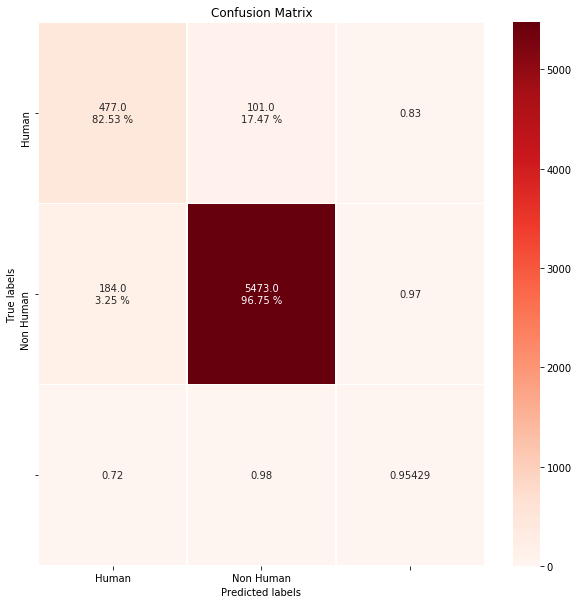

In [5]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(38,32), random_state=0,activation="relu")
clf.fit(normalized_X_train, y_train)
result = clf.predict(normalized_X_test)

# print(confusion_matrix(result, y_test))
print("Accuracy:", accuracy_score(result, y_test))
create_confusion_matrix(result, y_test, ['Human', 'Non Human'])

Accuracy: 0.933279871692061
Precision: Class A 0.8
Precision: Class B 0.94
Recall: Class A 0.49
Recall: Class B 0.99
F1-Score: Class A 0.61
F1-Score: Class B 0.96
Average F1-score: 0.78


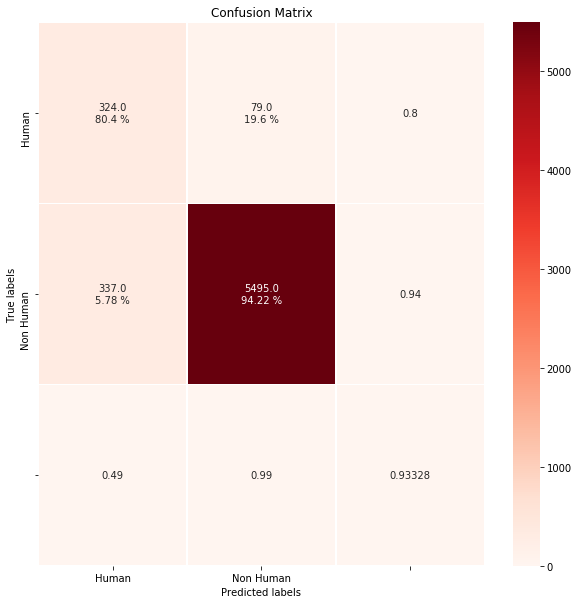

In [6]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=2, random_state=0, n_estimators=100)
clf.fit(normalized_X_train, y_train)
result = clf.predict(normalized_X_test)

# print(confusion_matrix(result, y_test))
print("Accuracy:", accuracy_score(result, y_test))
create_confusion_matrix(result, y_test,['Human', 'Non Human'])

In [ ]:
from sklearn.model_selection import cross_val_score
for i in range(10,40):
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(38,i), random_state=12)
    scores = cross_val_score(clf, normalized_X_train, y_train, cv=4, scoring="accuracy")
    print("hidden layer", i, "score average", scores.mean())

In [4]:
import glob
car_front_1 = glob.glob('../data/Result/67_Ford_Black_front/*_overall.csv')

In [11]:
import glob
import pandas as pd
def get_fft_set(file_names):
    fft_set = []
    for front in file_names:
        data = pd.read_csv(front)
        fft_data = fft_from_data_frame(data)
        fft_set = fft_data + fft_set
    return fft_set
car_front_1_fft = get_fft_set(car_front_1)

In [17]:
car_front_1_fft[0]

array([0.00295384, 0.00167613, 0.00156211, 0.00092082, 0.00150448,
       0.00116081, 0.0003425 , 0.00038491, 0.00199148, 0.00158181,
       0.00170268, 0.00087527, 0.00093394, 0.00207109, 0.00128776,
       0.0028888 , 0.00445775, 0.00237145, 0.00120747, 0.00187539,
       0.00283228, 0.00180356, 0.00036558, 0.00091158, 0.00045877,
       0.00207971, 0.00296382, 0.00178971, 0.00369352, 0.00503866,
       0.0037049 , 0.00705009, 0.01002658, 0.00494031, 0.00999422,
       0.01502054, 0.01487842, 0.01816496, 0.01802595, 0.01355562,
       0.01846581, 0.01929134, 0.02738222, 0.02050688, 0.03336334,
       0.03074747, 0.03834623, 0.04503632, 0.06797195, 0.05835171,
       0.03445862, 0.0187843 , 0.01504652, 0.00837102, 0.00398868,
       0.00555   , 0.00362419, 0.00206243, 0.00225625, 0.00338359,
       0.00072316, 0.00122167, 0.00207282, 0.00053503, 0.00224748,
       0.00308641, 0.00099943, 0.00070698, 0.000804  , 0.00129651,
       0.00122635, 0.00105776, 0.00103395, 0.00037036, 0.00074

In [32]:
features_set = { f'features_{index}': item for index,item  in enumerate(car_front_1_fft[0]) }

In [33]:
row = {
    'type': 'CAR',
    'model': 'UNDEFINED',
    'distance': 80
}
features_set.update(row)

In [43]:
row = [{
    'type': 'CAR',
    'model': 'UNDEFINED',
    'distance': 80
}]*len(car_front_1_fft)

In [58]:
df = pd.DataFrame(car_front_1_fft)
df['type'] = ['CAR']*len(car_front_1_fft)
df['model'] = ['undefined']*len(car_front_1_fft)
df['distance'] = [80]*len(car_front_1_fft)

In [69]:
df = df.set_index(['distance', 'type', 'model']).reset_index()
pandas = pd.DataFrame(car_front_1_fft)

In [ ]:
car_front_2 = glob.glob('../data/Result/99_Fiesta_Purple_front/*_overall.csv')
car_front_2_fft = get_fft_set(car_front_2)

In [82]:
df2 = pd.DataFrame(car_front_2_fft)
df2['type'] = ['CAR']*len(car_front_2_fft)
df2['model'] = ['undefined']*len(car_front_2_fft)
df2['distance'] = [80]*len(car_front_2_fft)
df2 = df2.set_index(['distance', 'type', 'model']).reset_index()


In [77]:
pandas = pd.DataFrame()

,distance,type,model,0,1,2,3,4,5,6,...,80,81,82,83,84,85,86,87,88,89
0,80,CAR,undefined,0.001391,0.000380,0.000503,0.000784,0.001182,0.002788,0.001537,...,0.002310,0.001115,0.001078,0.000849,0.000311,0.000995,0.001556,0.000967,0.008282,0.001894
1,80,CAR,undefined,0.001761,0.002163,0.002049,0.000695,0.001003,0.002970,0.000832,...,0.000616,0.002406,0.000193,0.002070,0.001135,0.000777,0.001621,0.001204,0.007539,0.001286
2,80,CAR,undefined,0.001444,0.001317,0.001164,0.000770,0.001279,0.003413,0.006235,...,0.001409,0.001382,0.001621,0.001148,0.000765,0.000290,0.001548,0.001941,0.006226,0.000998
3,80,CAR,undefined,0.001810,0.000958,0.000794,0.000993,0.001257,0.001433,0.003768,...,0.001005,0.000939,0.000813,0.001205,0.000843,0.000354,0.000227,0.001447,0.007005,0.002111
4,80,CAR,undefined,0.001821,0.000450,0.000852,0.000470,0.000938,0.001594,0.003878,...,0.001325,0.000841,0.001282,0.000584,0.000935,0.000359,0.000283,0.000471,0.005858,0.000318
5,80,CAR,undefined,0.002830,0.000852,0.001561,0.002132,0.000745,0.000998,0.000486,...,0.001292,0.001848,0.000839,0.000936,0.000102,0.000635,0.000774,0.002666,0.006677,0.001351
6,80,CAR,undefined,0.001016,0.000999,0.001741,0.001331,0.000455,0.001330,0.000716,...,0.000558,0.001578,0.000237,0.000716,0.001137,0.000485,0.001776,0.000677,0.006703,0.000889
7,80,CAR,undefined,0.002397,0.002045,0.000463,0.001338,0.000845,0.001424,0.004441,...,0.001079,0.001501,0.001425,0.000543,0.001099,0.001147,0.001237,0.001500,0.006902,0.001585
8,80,CAR,undefined,0.002155,0.000838,0.001761,0.001994,0.001323,0.001949,0.004779,...,0.000153,0.001795,0.001552,0.000420,0.001426,0.001497,0.000862,0.001235,0.006098,0.000777
9,80,CAR,undefined,0.003667,0.000933,0.001596,0.001171,0.000661,0.001788,0.003682,...,0.001110,0.000549,0.001957,0.000658,0.000654,0.001548,0.000255,0.000160,0.005213,0.001759
